In [1]:
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

## Задание 1

1. Напишите "наивную" рекуррентную функцию вычисления n-го [числа Фибоначчи](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8). То есть функция которая для вычисления предыдущих чисел Фибоначчи просто вызывает саму себя.
2. Напишите рекуррентную функцию вычисления списка чисел Фибоначчи (от 0-го до n-го) по данному n
3. C помощью Timer и matplotlib нарисуйте график роста времени работы этих функций по мере увеличения n.


In [2]:
def nai_fib(n):
  return nai_fib(n-1) + nai_fib(n-2) if n > 1 else n

In [3]:
for i in range(1,10): print(nai_fib(i), end=" ")

1 1 2 3 5 8 13 21 34 

In [4]:
def fibonacci_list(n):
    if n == 0:
        return [0]
    elif n == 1:
        return [0, 1]
    else:
        fib_list = fibonacci_list(n-1)
        fib_list.append(fib_list[-1] + fib_list[-2])
        return fib_list

In [5]:
fibonacci_list(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

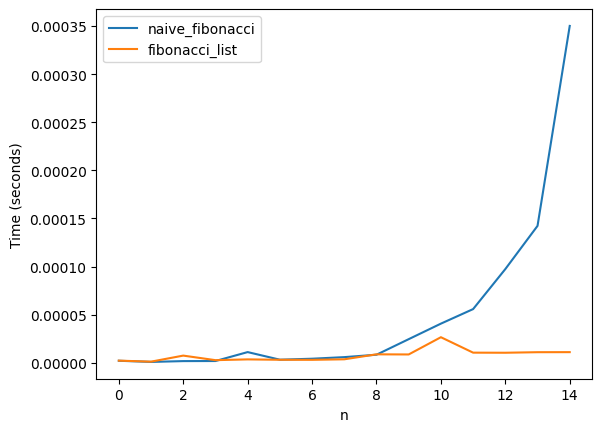

In [6]:
import timeit
import matplotlib.pyplot as plt

n_values = list(range(15))

# Измеряем время работы наивной рекуррентной функции и функции вычисления списка
naive_times = []
list_times = []

for n in n_values:
    # Измеряем время работы наивной рекуррентной функции
    naive_time = timeit.timeit(lambda: nai_fib(n), number=1)
    naive_times.append(naive_time)

    # Измеряем время работы функции вычисления списка
    list_time = timeit.timeit(lambda: fibonacci_list(n), number=1)
    list_times.append(list_time)

# Строим графики
plt.plot(n_values, naive_times, label='naive_fibonacci')
plt.plot(n_values, list_times, label='fibonacci_list')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

## Задание 2
Напишите генератор бесконечной последовательности чисел Фибоначчи начиная с 0-го.

In [7]:
def fib_eternal():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

In [8]:
fib = fib_eternal()

In [9]:
next(fib)

0

In [10]:
next(fib)

1

In [11]:
next(fib)

1

In [12]:
next(fib)

2

In [13]:
next(fib)

3

In [14]:
next(fib)

5

In [15]:
next(fib)

8

## Задание 3

1. с помощью Timer напишите функцию высшего порядка `my_timeit(foo)`, результат которой - функция подсчёта времени работы foo для разных входных значений, и которую можно подать на вход `plot_discrete`
2. Задекорируйте рекурсивную функцию fib из задания 1.1 для кеширования результатов, сравните как изменилось время работы с помощью `plot_discrete(my_timeit(...)))`

In [16]:
import time

def my_timeit(foo):
    def timed(*args, **kwargs):
        timer = timeit.Timer(lambda: foo(*args, **kwargs))
        elapsed_time = timer.timeit(1)
        return elapsed_time
        
    timed.__name__ = foo.__name__
    return timed

In [17]:
def plot_discrete(foo, values=range(1,25)):
  y = [foo(x) for x in values]
  plt.scatter(values, y)
  plt.plot(values, y, label=foo.__name__)
  plt.legend()
  plt.xlabel('n')
  plt.ylabel('Time (seconds)')

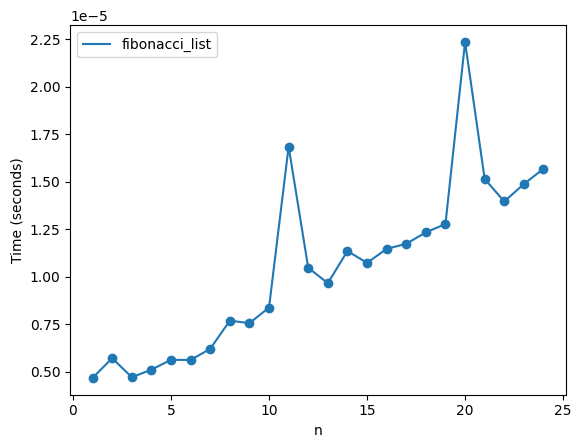

In [18]:
plot_discrete(my_timeit(fibonacci_list))

In [19]:
from functools import lru_cache
@lru_cache
def fibonacci_cached(n):
  return (fibonacci_cached(n-1) + fibonacci_cached(n-2)) if n > 1 else n

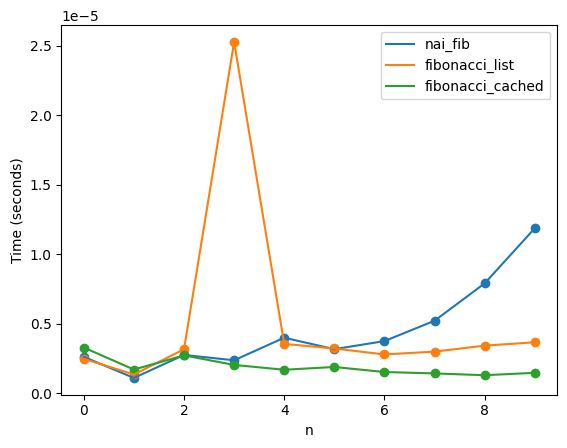

In [20]:
nn = 10
plot_discrete(my_timeit(nai_fib), range(nn))
plot_discrete(my_timeit(fibonacci_list), range(nn))
plot_discrete(my_timeit(fibonacci_cached), range(nn))

## Задание 4
Напишите функцию, производяющую с помощью reduce композицию функций из списка по порядку.
С помощью неё создайте функцию [сигмоиды](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0) `1 / (1 + e**(-x))` из 
`inc`, `reciprocal`, `negate` и `math.exp`

In [21]:
from functools import reduce

In [22]:
def inc(x):
  return x + 1
inc(1)

2

In [23]:
reciprocal = lambda x: 1/x
reciprocal(4.)

0.25

In [24]:
negate = lambda x: -x
negate(3.5)

-3.5

In [25]:
from math import exp
exp(1.)

2.718281828459045

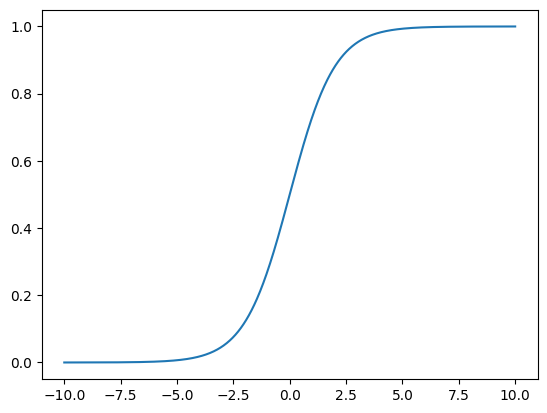

In [26]:
from typing import Callable, List

def plot_symmetric(foo):
  x_space = np.linspace(-10, 10, num=1000)
  y = [foo(x) for x in x_space]
  plt.plot(x_space, y)

def compose_all(*functions):
    return reduce(lambda f, g: lambda x: f(g(x)), functions)

sigmoid = compose_all(reciprocal, inc, exp, negate)

plot_symmetric(sigmoid)
plt.show()